In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('weight-height.csv')

In [3]:
df.drop(['Gender'], axis="columns", inplace=True)

Text(0, 0.5, 'Height')

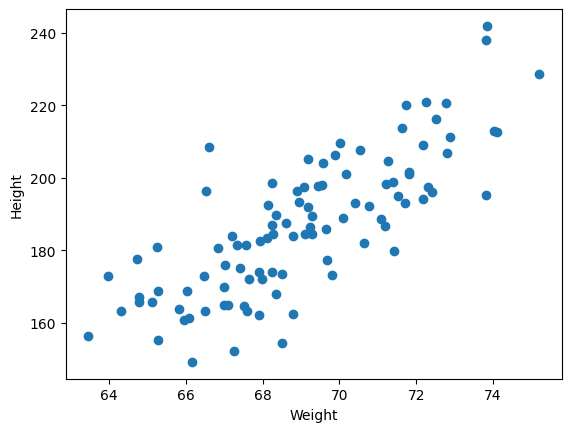

In [4]:
plt.scatter(df['Weight'], df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

In [5]:
# Finding correlations to check if x and y coordinates are correlated. 

In [6]:
df.corr()

,Weight,Height
Weight,1.000000,0.790023
Height,0.790023,1.000000


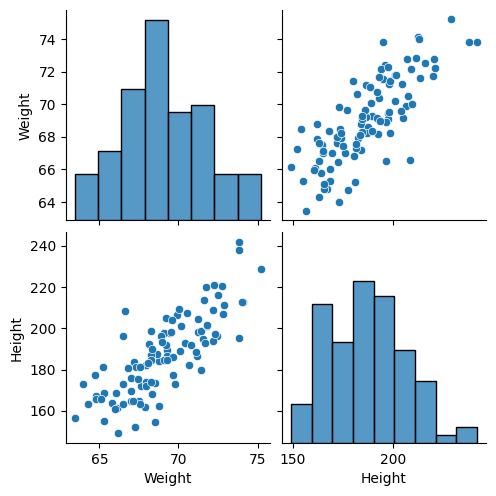

In [7]:
sns.pairplot(df)

In [8]:
## Independent and dependent variable

In [9]:
## Independent features should be either dataframe or 2D array!
## Dependent features will be 1D 
x = df[['Weight']]
y = df['Height']

In [10]:
x

,Weight
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796
...,...
94,67.103551
95,65.117485
96,71.701234
97,66.832878


In [11]:
y

0     241.893563
1     162.310473
2     212.740856
3     220.042470
4     206.349801
         ...    
94    164.974581
95    165.717112
96    193.094164
97    180.683887
98    172.773723
Name: Height, Length: 99, dtype: float64

In [12]:
## Train, Test, Split

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.25, random_state=42)

In [14]:
x_train.shape

(74, 1)

In [15]:
x_test.shape

(25, 1)

In [16]:
y_train.shape

(74,)

In [17]:
y_test.shape

(25,)

In [18]:
#### Standardization

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scalar = StandardScaler()

In [21]:
x_train = scalar.fit_transform(x_train)

In [22]:
x_test = scalar.transform(x_test)

In [23]:
x_train

array([[ 0.0448092 ],
       [-2.2692487 ],
       [-0.33263887],
       [ 1.03963867],
       [-1.53229474],
       [-0.79475668],
       [-0.18242581],
       [-0.66631531],
       [ 1.31295111],
       [-0.73432872],
       [ 0.4186318 ],
       [-0.06979064],
       [ 0.5383612 ],
       [ 1.35398376],
       [ 0.24031242],
       [ 0.20533154],
       [-0.2914221 ],
       [-1.03895221],
       [ 1.50863799],
       [-0.45819867],
       [-0.60328079],
       [-0.37409372],
       [-0.70286832],
       [ 0.08641493],
       [-0.475506  ],
       [ 1.0760954 ],
       [-2.0598912 ],
       [-1.31882001],
       [-0.82896076],
       [ 1.28397937],
       [-0.11492016],
       [-1.22918008],
       [ 0.00276644],
       [-1.54937654],
       [-0.28958614],
       [-1.05038354],
       [-0.84028332],
       [-1.20446004],
       [-1.73311572],
       [-0.32147104],
       [-0.3305091 ],
       [ 1.49429616],
       [ 0.19514438],
       [ 1.06406986],
       [-1.03366492],
       [ 1

In [24]:
# Apply simple linear regression

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
regression = LinearRegression(n_jobs=-1)

In [27]:
regression.fit(x_train, y_train)

LinearRegression(n_jobs=-1)

In [28]:
print("coefficient or slope : " , regression.coef_)
print("Intercept : " , regression.intercept_)

coefficient or slope :  [14.27529787]
Intercept :  188.15363316167125


In [29]:
# Plot the training data best fit line

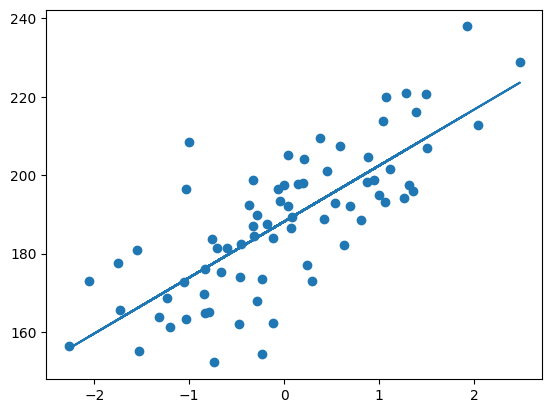

In [30]:
plt.scatter(x_train, y_train)
plt.plot(x_train, regression.predict(x_train))

In [31]:
regression.predict(x_train)

array([188.7932978 , 155.75943198, 183.4051142 , 202.99478482,
       166.2796693 , 176.80824488, 185.54945045, 178.64178357,
       206.89640133, 177.67087198, 194.12972682, 187.15735092,
       195.83889959, 207.48215459, 191.58416459, 191.08480211,
       183.99349582, 173.32228092, 209.68988989, 181.61271067,
       179.54162012, 182.81333381, 178.11997858, 189.38723206,
       181.36564341, 203.51521554, 158.74807265, 169.32708471,
       176.31997133, 206.48282119, 186.51311371, 170.60672136,
       188.19312497, 166.0358215 , 184.01970476, 173.15909522,
       176.15833849, 170.95960735, 163.41289001, 183.56453826,
       183.43551728, 209.48515591, 190.93937729, 203.3435473 ,
       173.39775857, 206.16112326, 200.54260225, 188.79154627,
       199.7524554 , 197.99471083, 200.75650339, 202.34498242,
       163.12052341, 193.60209551, 176.19261323, 192.38489074,
       177.32751447, 184.84709257, 186.49477662, 184.81843672,
       190.28971257, 217.24623099, 223.57098102, 187.47

In [32]:
# Prediction for the test data!

In [34]:
y_pred = regression.predict(x_test)

In [35]:
y_pred

array([215.56344413, 181.83393832, 165.34576006, 191.44758131,
       175.24606899, 170.20585817, 201.71156482, 166.22798777,
       200.42404864, 215.72782926, 216.80588213, 203.966592  ,
       206.06464282, 188.27081022, 179.15590003, 192.84274863,
       171.29986086, 163.31908174, 183.39295485, 179.64616919,
       210.09110174, 189.42439944, 182.55562121, 179.93676691,
       160.65185609])

In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [37]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [38]:
mse

136.39999690030675

In [39]:
mae

9.022948613121555

In [41]:
rmse

np.float64(11.679040923821901)

### OLS linear regression

In [48]:
import statsmodels.api as sm

In [49]:
model = sm.OLS(y_train, x_train).fit()

In [53]:
prediction = model.predict(x_test)

In [55]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.006
Model:                            OLS   Adj. R-squared (uncentered):             -0.008
Method:                 Least Squares   F-statistic:                             0.4185
Date:                Sat, 12 Apr 2025   Prob (F-statistic):                       0.520
Time:                        16:11:00   Log-Likelihood:                         -492.71
No. Observations:                  74   AIC:                                      987.4
Df Residuals:                      73   BIC:                                      989.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [56]:
### Prediction for the new Data

In [61]:
regression.predict(scalar.transform([[72]]))

H:\Python-all-in-one\ML-algorithams\myenv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([205.06786057])